In [3]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
import IPython.display
import os
import csv
import pathlib
import seaborn as sns
from scipy import stats

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#tenserflow
import tensorflow as tf

#Keras
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from  keras.utils import to_categorical

# Data Overview

-  We use the GTZAN dataset which has been the most widely used in the music genre classification task. The dataset contains 30-second audio files including 10 different genres including reggae, classical, country, jazz, metal, pop, disco, hiphop, rock and blues.

###  Audio features:

- <b>Zero Crossing Rate</b>: The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back.
- <b>Spectral Centroid</b>: It indicates where the ”centre of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.
- <b>Spectral Rolloff</b>: It is a measure of the shape of the signal.
- <b>Mel-Frequency Cepstral Coefficients</b>: The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which describe the overall shape of a spectral envelope.
- <b>Chroma Frequencies</b>: 

In [2]:
# Example of Blues music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/blues/blues.00080.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [3]:
IPython.display.Audio(data=y, rate=sr)

- Each audio file was converted into a spectrogram which is a visual representation of spectrum of frequencies over time. 

In [5]:
# Example of Metal music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/metal/metal.00024.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [72]:
# Example of Rock music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/rock/rock.00014.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
ps.shape

(128, 431)

In [8]:
IPython.display.Audio(data=y, rate=sr)

### Melspectrogram

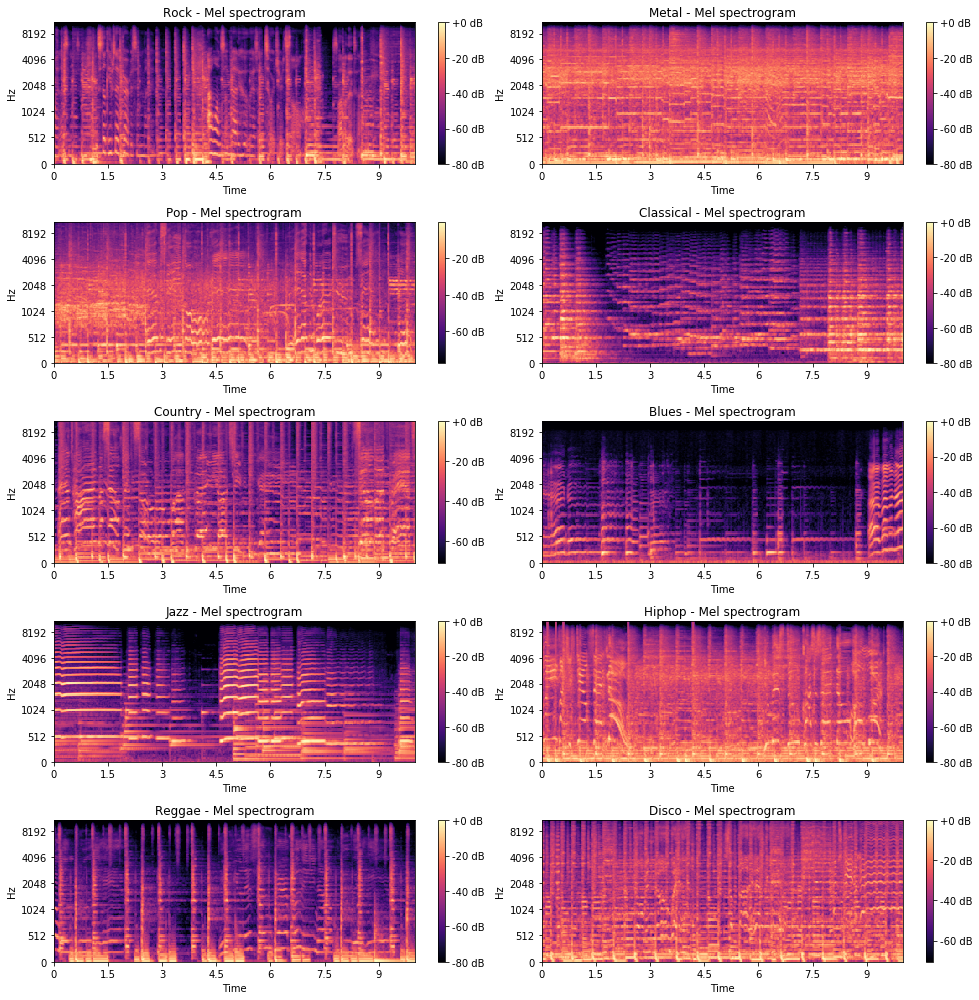

In [112]:
plt.figure(figsize=(14, 14))

#Plot melspectrogram for Rock music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/rock/rock.00014.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
plt.subplot(5, 2, 1)
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Rock - Mel spectrogram')
plt.tight_layout()


#Plot melspectrogram for Metal music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/metal/metal.00014.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
plt.subplot(5, 2, 2)
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Metal - Mel spectrogram')
plt.tight_layout()

#Plot melspectrogram for Pop music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/pop/pop.00014.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
plt.subplot(5, 2, 3)
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Pop - Mel spectrogram')
plt.tight_layout()



#Plot melspectrogram for Classical music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/classical/classical.00014.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
plt.subplot(5, 2, 4)
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Classical - Mel spectrogram')
plt.tight_layout()

#Plot melspectrogram for Country music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/country/country.00014.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
plt.subplot(5, 2, 5)
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Country - Mel spectrogram')
plt.tight_layout()


#Plot melspectrogram for Blues music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/blues/blues.00014.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
plt.subplot(5, 2, 6)
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Blues - Mel spectrogram')
plt.tight_layout()

#Plot melspectrogram for Jazz music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/jazz/jazz.00014.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
plt.subplot(5, 2, 7)
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Jazz - Mel spectrogram')
plt.tight_layout()


#Plot melspectrogram for Hiphop music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/hiphop/hiphop.00014.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
plt.subplot(5, 2, 8)
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Hiphop - Mel spectrogram')
plt.tight_layout()


#Plot melspectrogram for Reggae music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/reggae/reggae.00014.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
plt.subplot(5, 2, 9)
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Reggae - Mel spectrogram')
plt.tight_layout()


#Plot melspectrogram for Disco music
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/disco/disco.00014.wav', duration=10)
ps = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
plt.subplot(5, 2, 10)
librosa.display.specshow(librosa.power_to_db(ps, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Disco - Mel spectrogram')
plt.tight_layout()

plt.savefig( 'D:/DataScienceFoundation/SpringBoard/Capstone Project2/melspectrogram.png')

### WavePlot:
#### Plot the amplitude envelope of a waveform.

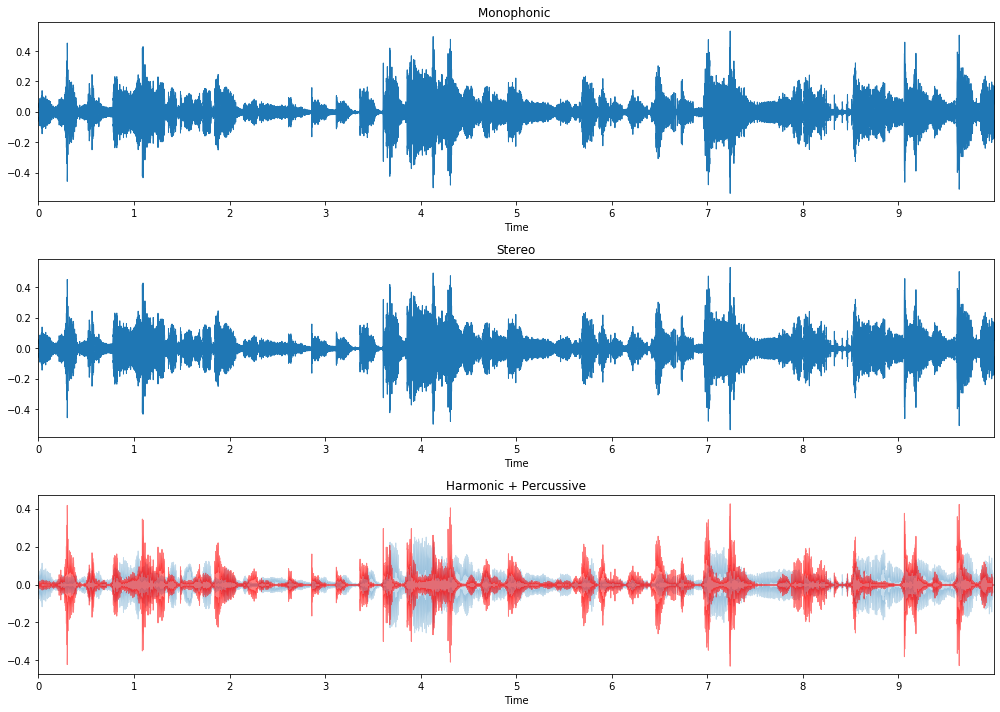

In [88]:
plt.figure(figsize=(14, 10))
#librosa.display.waveplot(y, sr=sr)

y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/rock/rock.00014.wav', duration=10)
plt.subplot(3, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic ')

y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/rock/rock.00014.wav', mono=False, duration=10)
plt.subplot(3, 1, 2)
librosa.display.waveplot(y, sr=sr)
plt.title('Stereo')


#y, sr = librosa.load(librosa.util.example_audio_file(), duration=10)
y_harm, y_perc = librosa.effects.hpss(y)
plt.subplot(3, 1, 3)
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.tight_layout()
plt.show()

## Draw a chromagram with pitch classes

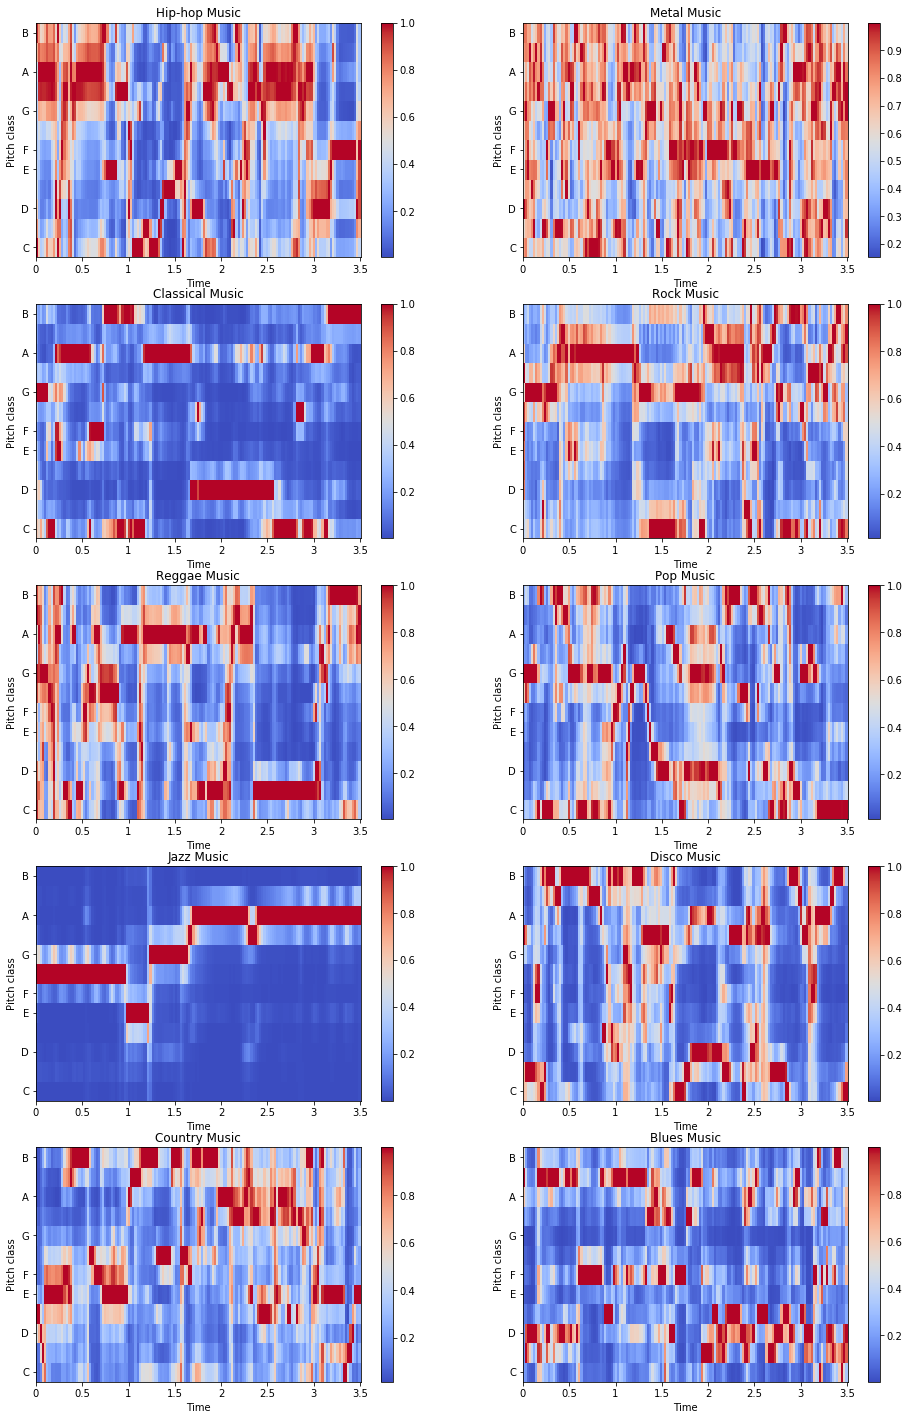

In [108]:
# Loadign hiphop Music file
plt.figure(figsize=(16, 25))
x, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/hiphop/hiphop.00004.wav', duration =3.5)
plt.subplot(5, 2, 1)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length )
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.title('Hip-hop Music')
plt.colorbar()

# Loadign th metale Music file
x, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/metal/metal.00004.wav', duration =3.5)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length )
plt.subplot(5, 2, 2)
plt.title('Metal Music')
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()

# Loadign the Classical Music file
x, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/classical/classical.00004.wav', duration =3.5)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length )
plt.subplot(5, 2, 3)
plt.title('Classical Music')
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()


# Loadign the Rock Music file
x, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/rock/rock.00004.wav', duration =3.5)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length )
plt.subplot(5, 2, 4)
plt.title('Rock Music')
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()


# Loadign the Reggae Music file
x, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/reggae/reggae.00004.wav', duration =3.5)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length )
plt.subplot(5, 2, 5)
plt.title('Reggae Music')
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()


# Loadign the Pop Music file
x, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/pop/pop.00004.wav', duration =3.5)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length )
plt.subplot(5, 2, 6)
plt.title('Pop Music')
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()


# Loadign the Jazz Music file
x, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/jazz/jazz.00004.wav', duration =3.5)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length )
plt.subplot(5, 2, 7)
plt.title('Jazz Music')
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()

# Loadign the Disco Music file
x, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/disco/disco.00004.wav', duration =3.5)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length )
plt.subplot(5, 2, 8)
plt.title('Disco Music')
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()


# Loadign the Country Music file
x, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/country/country.00004.wav', duration =3.5)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length )
plt.subplot(5, 2, 9)
plt.title('Country Music')
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()

# Loadign the Blues Music file
x, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/blues/blues.00004.wav', duration =3.5)
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length )
plt.subplot(5, 2, 10)
plt.title('Blues Music')
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()

plt.savefig("D:/DataScienceFoundation/SpringBoard/Capstone Project2/chromgram.png")

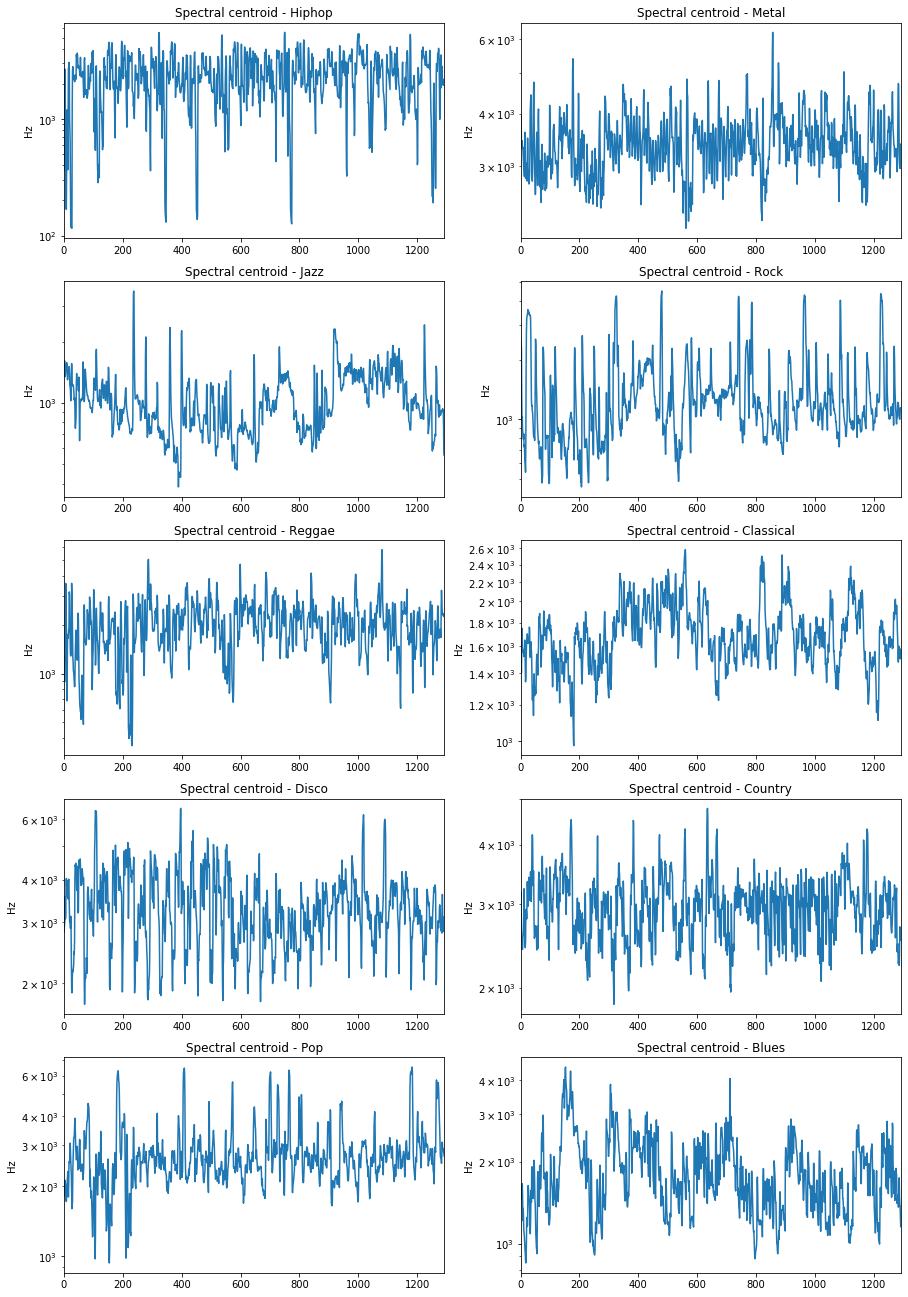

In [136]:
plt.figure(figsize=(15, 23))
y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/hiphop/hiphop.00004.wav')
S, phase = librosa.magphase(librosa.stft(y=y))
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
librosa.feature.spectral_centroid(S=S)
#librosa.feature.spectral_centroid(S=np.abs(D), freq=if_gram)
plt.subplot(5, 2, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.title("Spectral centroid - Hiphop")
plt.xlim([0, cent.shape[-1]])



y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/metal/metal.00004.wav')
S, phase = librosa.magphase(librosa.stft(y=y))
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
librosa.feature.spectral_centroid(S=S)
#librosa.feature.spectral_centroid(S=np.abs(D), freq=if_gram)
plt.subplot(5, 2, 2)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.title("Spectral centroid - Metal")
plt.xlim([0, cent.shape[-1]])




y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/jazz/jazz.00004.wav')
S, phase = librosa.magphase(librosa.stft(y=y))
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
librosa.feature.spectral_centroid(S=S)
#librosa.feature.spectral_centroid(S=np.abs(D), freq=if_gram)
plt.subplot(5, 2, 3)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.title("Spectral centroid - Jazz")
plt.xlim([0, cent.shape[-1]])


y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/rock/rock.00004.wav')
S, phase = librosa.magphase(librosa.stft(y=y))
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
librosa.feature.spectral_centroid(S=S)
#librosa.feature.spectral_centroid(S=np.abs(D), freq=if_gram)
plt.subplot(5, 2, 4)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.title("Spectral centroid - Rock")
plt.xlim([0, cent.shape[-1]])


y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/reggae/reggae.00004.wav')
S, phase = librosa.magphase(librosa.stft(y=y))
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
librosa.feature.spectral_centroid(S=S)
#librosa.feature.spectral_centroid(S=np.abs(D), freq=if_gram)
plt.subplot(5, 2, 5)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.title("Spectral centroid - Reggae")
plt.xlim([0, cent.shape[-1]])

y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/classical/classical.00004.wav')
S, phase = librosa.magphase(librosa.stft(y=y))
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
librosa.feature.spectral_centroid(S=S)
#librosa.feature.spectral_centroid(S=np.abs(D), freq=if_gram)
plt.subplot(5, 2, 6)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.title("Spectral centroid - Classical")
plt.xlim([0, cent.shape[-1]])


y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/disco/disco.00004.wav')
S, phase = librosa.magphase(librosa.stft(y=y))
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
librosa.feature.spectral_centroid(S=S)
#librosa.feature.spectral_centroid(S=np.abs(D), freq=if_gram)
plt.subplot(5, 2, 7)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.title("Spectral centroid - Disco")
plt.xlim([0, cent.shape[-1]])

y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/country/country.00004.wav')
S, phase = librosa.magphase(librosa.stft(y=y))
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
librosa.feature.spectral_centroid(S=S)
#librosa.feature.spectral_centroid(S=np.abs(D), freq=if_gram)
plt.subplot(5, 2, 8)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.title("Spectral centroid - Country")
plt.xlim([0, cent.shape[-1]])


y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/pop/pop.00004.wav')
S, phase = librosa.magphase(librosa.stft(y=y))
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
librosa.feature.spectral_centroid(S=S)
#librosa.feature.spectral_centroid(S=np.abs(D), freq=if_gram)
plt.subplot(5, 2, 9)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.title("Spectral centroid - Pop")
plt.xlim([0, cent.shape[-1]])


y, sr = librosa.load('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/blues/blues.00004.wav')
S, phase = librosa.magphase(librosa.stft(y=y))
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
librosa.feature.spectral_centroid(S=S)
#librosa.feature.spectral_centroid(S=np.abs(D), freq=if_gram)
plt.subplot(5, 2, 10)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.title("Spectral centroid - Blues")
plt.xlim([0, cent.shape[-1]])

plt.savefig("D:/DataScienceFoundation/SpringBoard/Capstone Project2/Spectral-centroid.png")

## Data Wrangling


### Extracting the Spectrogram for every Audio

In [26]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    pathlib.Path(f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/{g}'):
        songname = f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 720x720 with 0 Axes>

In [5]:
header = 'filename chroma_stft spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()


 ## Writing data to csv file

In [6]:
file = open('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/{g}'):
        songname = f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'  
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [7]:
data = pd.read_csv('D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/data.csv')
data.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,1784.420446,2002.650192,3806.485316,0.083066,-113.596748,121.557297,-19.158825,42.351032,...,8.810669,-3.667369,5.751690,-5.162763,0.750948,-1.691938,-0.409953,-2.300209,1.219929,blues
1,blues.00001.wav,0.340983,1529.835316,2038.617579,3548.820207,0.056044,-207.556793,124.006721,8.930560,35.874687,...,5.376802,-2.239120,4.216963,-6.012273,0.936110,-0.716537,0.293876,-0.287431,0.531574,blues
2,blues.00002.wav,0.363603,1552.481958,1747.165985,3040.514948,0.076301,-90.754387,140.459915,-29.109968,31.689013,...,5.789265,-8.905224,-1.083720,-9.218360,2.455806,-7.726901,-1.815723,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,1070.119953,1596.333948,2185.028454,0.033309,-199.431152,150.099213,5.647593,26.871927,...,6.087676,-2.476421,-1.073890,-2.874778,0.780977,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,1835.494603,1748.362448,3580.945013,0.101500,-160.266037,126.198807,-35.605450,22.153301,...,-2.806384,-6.934123,-7.558618,-9.173553,-4.512165,-5.453538,-0.924161,-4.409333,-11.703781,blues


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
filename              1000 non-null object
chroma_stft           1000 non-null float64
spectral_centroid     1000 non-null float64
spectral_bandwidth    1000 non-null float64
rolloff               1000 non-null float64
zero_crossing_rate    1000 non-null float64
mfcc1                 1000 non-null float64
mfcc2                 1000 non-null float64
mfcc3                 1000 non-null float64
mfcc4                 1000 non-null float64
mfcc5                 1000 non-null float64
mfcc6                 1000 non-null float64
mfcc7                 1000 non-null float64
mfcc8                 1000 non-null float64
mfcc9                 1000 non-null float64
mfcc10                1000 non-null float64
mfcc11                1000 non-null float64
mfcc12                1000 non-null float64
mfcc13                1000 non-null float64
mfcc14                1000 non-null float64
mfcc15         

## Data Expolaration

#### The following bar graph demonstrates the mean value of spectral_centroid for each genre songs

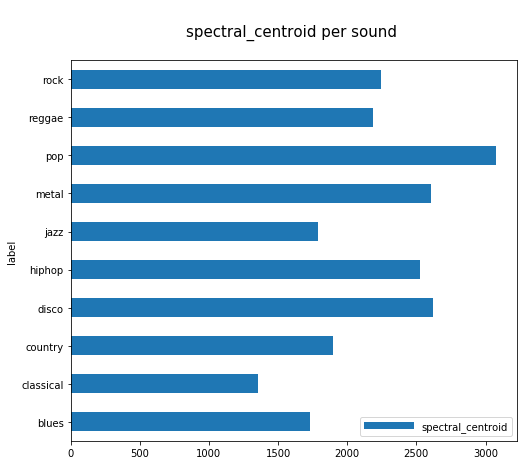

In [243]:
list = data[["spectral_centroid","label"]].sort_values(by="spectral_centroid",ascending=True)

data[["spectral_centroid", "label"]].groupby(["label"]).mean().plot.barh(figsize=(8,7))
#.plot.kde(figsize=(12,10))

plt.title("\nspectral_centroid per sound \n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()

#### The below graph shows the average value of chroma_stft feature of the music genre

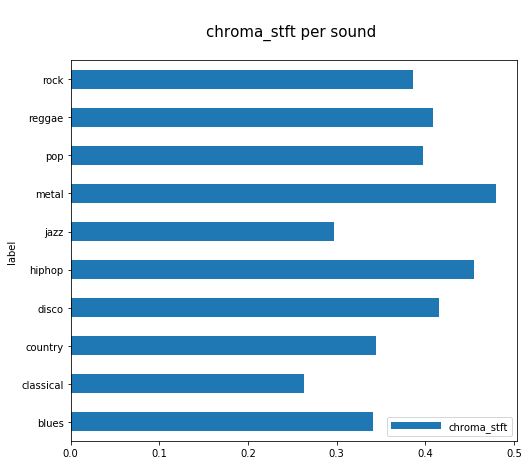

In [27]:
data[["chroma_stft", "label"]].groupby(["label"]).mean().plot.barh(figsize=(8,7))

plt.title("\nchroma_stft per sound \n", fontsize=15)
plt.legend(handlelength=5, fontsize  = 10)
plt.show()


In [245]:
### Rolloff

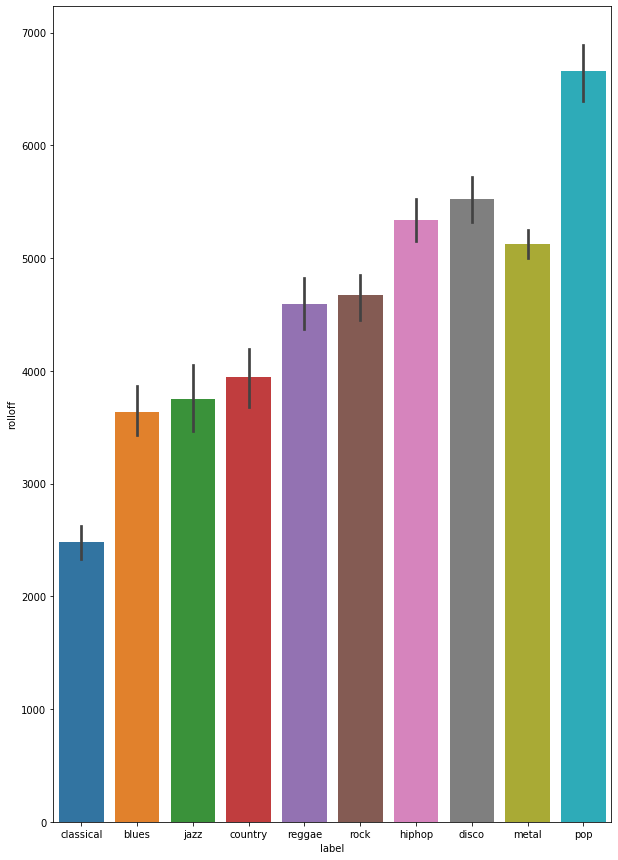

In [246]:
list = data[["rolloff","label"]].sort_values(by="rolloff",ascending=True)


plt.subplots(figsize=(10, 15))
sns.barplot(y="rolloff", x="label", data=list,
            label="rolloff per genre")

### Mel-Frequency Cepstral Coefficients for each genra 

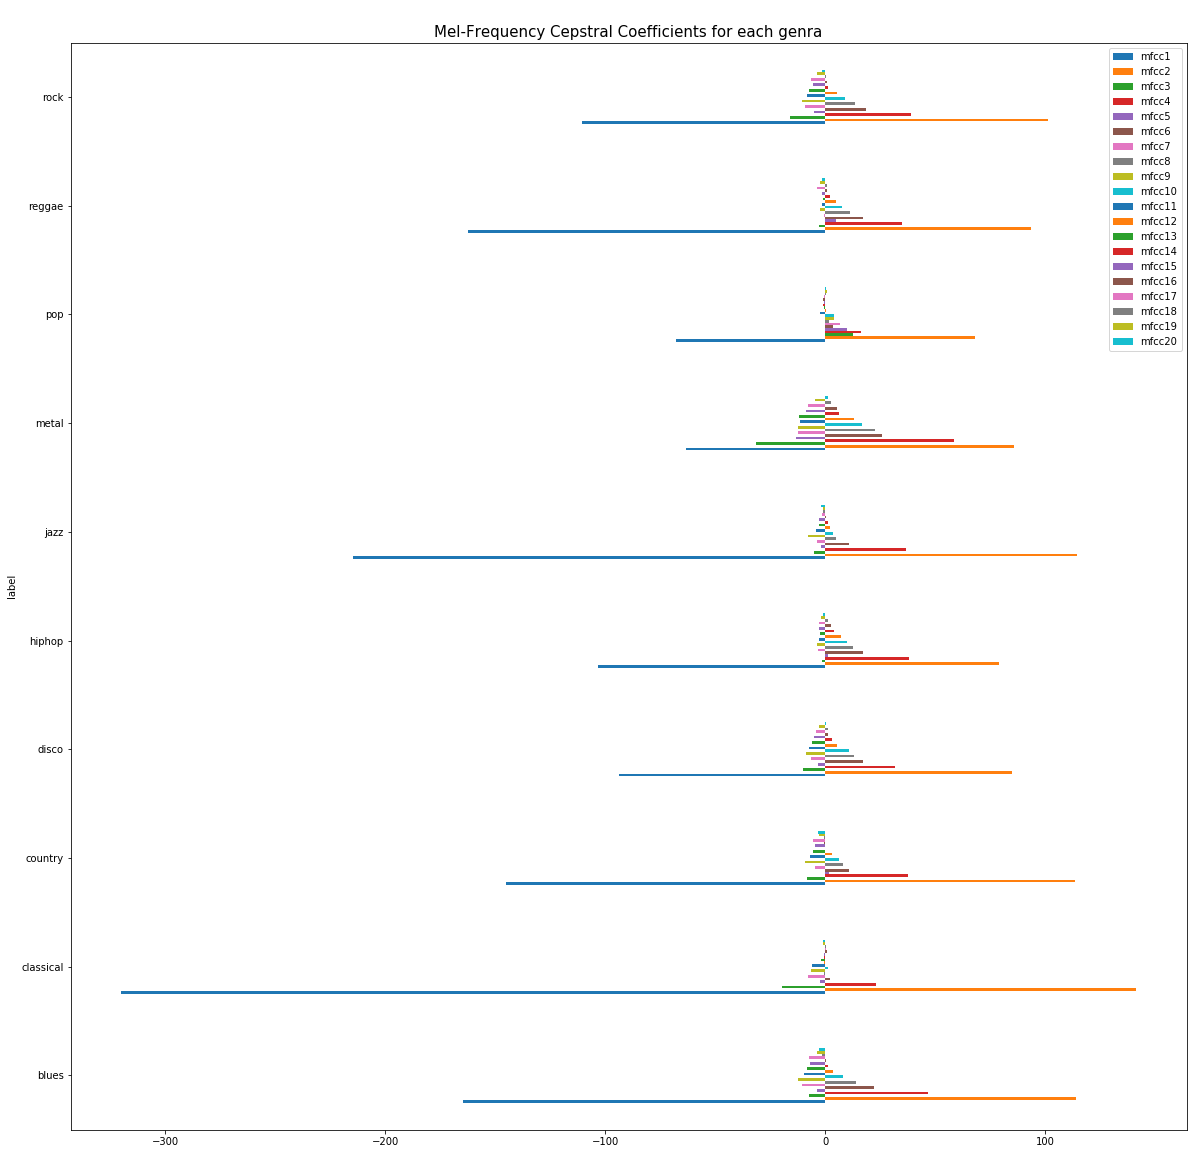

In [306]:
data[["label", 'mfcc1','mfcc2','mfcc3','mfcc4',
                       'mfcc5','mfcc6' ,'mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12',
                     "mfcc13", "mfcc14",'mfcc15','mfcc16','mfcc17','mfcc18', 'mfcc19','mfcc20']].groupby("label").mean().plot.barh(figsize=(20,20))

plt.title("\nMel-Frequency Cepstral Coefficients for each genra", fontsize=15)

plt.savefig("D:/DataScienceFoundation/SpringBoard/Capstone Project2/mel.png")

### The following correlation matrix has diplayed between music features

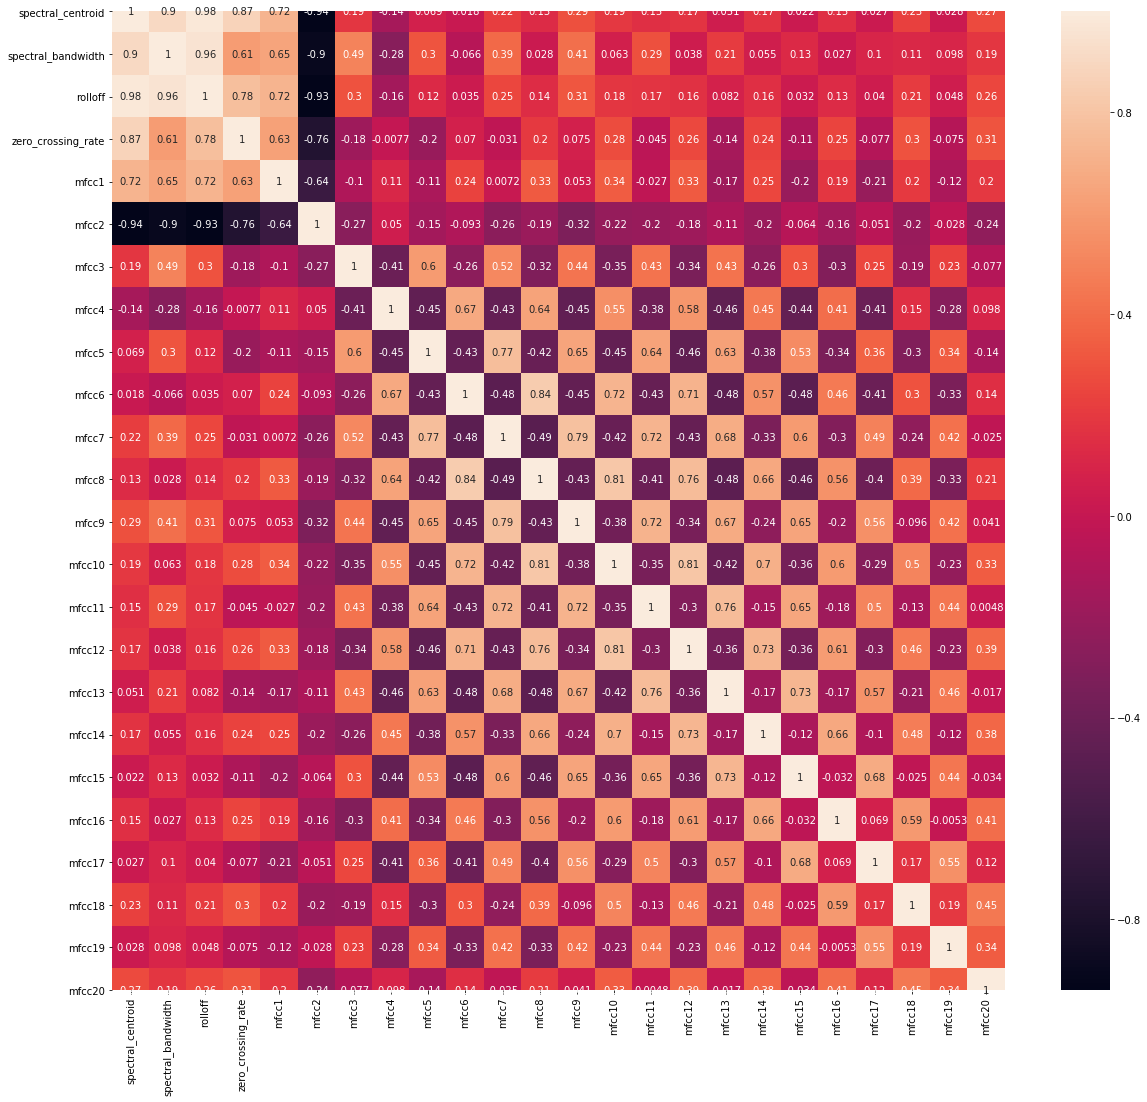

In [307]:
plt.figure(figsize = (20,18))

sns.heatmap(data[['spectral_centroid', 'spectral_bandwidth',
                       "rolloff",'zero_crossing_rate','mfcc1','mfcc2','mfcc3','mfcc4',
                       'mfcc5','mfcc6' ,'mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12',
                     "mfcc13", "mfcc14",'mfcc15','mfcc16','mfcc17','mfcc18', 'mfcc19','mfcc20']].corr(), annot=True)
plt.savefig("D:/DataScienceFoundation/SpringBoard/Capstone Project2/correlation.png")

# Inferential Statistics


## 1. Setup an appropriate hypothesis test.

 - H0: 'spectral_centroid' and 'rolloff'are correlated
 - Ha: 'spectral_centroid' and 'rolloff' are not correlated



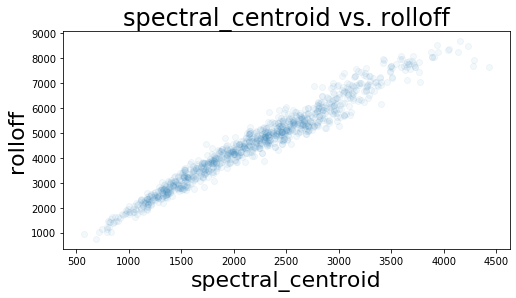

In [253]:
plt.figure(figsize=(8, 4))
plt.scatter(x=data['spectral_centroid'], y=data['rolloff'], alpha = .05)

plt.xlabel('spectral_centroid', fontsize=22)
plt.ylabel('rolloff', fontsize=22)
plt.title('spectral_centroid vs. rolloff', fontsize=24)

plt.show();

In [254]:
data[['spectral_centroid', 'rolloff']].corr()

,spectral_centroid,rolloff
spectral_centroid,1.000000,0.979633
rolloff,0.979633,1.000000


#### The correlation between spectral_centroid and rolloff os about 97%

In [256]:
clean_data = data.dropna(subset = ['spectral_centroid'])
clean_data = data.dropna(subset = ['rolloff'])

In [263]:
spectral_centroid = clean_data [['spectral_centroid']]
rolloff = clean_data [['rolloff']]

mean, mean_h0 = np.corrcoef(spectral_centroid, rolloff, rowvar = False)[0, 1], 0
n = len(data['spectral_centroid'])

mean

0.9796333818926216

In [266]:
#standard error
standard_error = np.sqrt((1-mean**2)/(n-2))
z = (mean-mean_h0)/standard_error

p = 2*stats.norm.cdf(z)


print('Standard Error (SE) = %.5f' %standard_error)
print('z-statistics value = %.4f' %z)
print('p-value using z-statistics = %.2f' %p)

Standard Error (SE) = 0.00636
z-statistics value = 154.1264
p-value using z-statistics = 2.00


In [267]:
confidence=99

#Using stats.norm.ppf  -- Percent Point Function
margin_of_error = stats.norm.ppf(0.05+confidence/200)*standard_error
confidence_interval = [mean-margin_of_error, mean+margin_of_error]

print('Margin of Error = %.5f' %margin_of_error)
print('Confidence interval is between %.5f and %.5f' %(confidence_interval[0], confidence_interval[1]))



Margin of Error = 0.00072
Confidence interval is between 0.97891 and 0.98035


#### Since p-value is greater than the 0.05 so we cannot reject the null hypothesis.

### 2. The hypothesis is the mean of zero_crossing_rate is 0.1008

In [280]:
a = data['zero_crossing_rate'].mean()
a

0.10363725784158576

In [289]:
from scipy.stats import ttest_1samp

ttest_1samp(data['zero_crossing_rate'], 0.1008)

Ttest_1sampResult(statistic=2.1446900710485095, pvalue=0.03221829991630641)

#### Since p-value is less than the 0.05, we can reject the null hypothesis

### 3. Setup an appropriate hypothesis test.
- H0: 'mfcc2' and 'rolloff'are correlated
- Ha: 'mfcc2' and 'rolloff' are not correlated

In [291]:
clean_data = data.dropna(subset = ['mfcc2'])
clean_data = data.dropna(subset = ['rolloff'])

In [302]:
spectral_centroid = clean_data [['mfcc2']]
rolloff = clean_data [['rolloff']]

mean, mean_h0 = np.corrcoef(spectral_centroid, rolloff, rowvar = False)[0, 1], 0
n = len(data['mfcc2'])

print("The mean is %.6f" %mean)

The mean is -0.934305


In [298]:
#standard error
standard_error = np.sqrt((1-mean**2)/(n-2))
z = (mean-mean_h0)/standard_error

p = 2*stats.norm.cdf(z)


print('Standard Error (SE) = %.5f' %standard_error)
print('z-statistics value = %.4f' %z)
print('p-value using z-statistics = %.6f' %p)

Standard Error (SE) = 0.01128
z-statistics value = -82.7993
p-value using z-statistics = 0.000000


In [299]:
confidence=99

#Using stats.norm.ppf  -- Percent Point Function
margin_of_error = stats.norm.ppf(0.05+confidence/200)*standard_error
confidence_interval = [mean-margin_of_error, mean+margin_of_error]

print('Margin of Error = %.5f' %margin_of_error)
print('Confidence interval is between %.5f and %.5f' %(confidence_interval[0], confidence_interval[1]))



Margin of Error = 0.00128
Confidence interval is between -0.93558 and -0.93303


#### Since p-value  is less than the 0.05, we can reject the null hypothesis

In [268]:
##############################################

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [9]:
def extract_feature_song(f):
    y,_ = librosa.load(f)
    
    mfcc = librosa.feature.mfcc(y)
    mfcc /= np.amax(np.absolute(mfcc))
    return np.ndarray.flatten(mfcc)[:25000]

In [10]:
def generate_feature_label():
    all_features =[]
    all_labels = []
    
    genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
    
    for genre in genres:
        for filename in os.listdir(f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/{genre}'):
            songname = f'D:/DataScienceFoundation/SpringBoard/Capstone Project2/data/genres/{genre}/{filename}'
            features = extract_feature_song(songname)
            all_features.append(features)
            all_labels.append(genre)
            
    label_unique_ids, label_row_ids = np.unique(all_labels, return_inverse= True)
    label_row_ids = label_row_ids.astype(np.int32, copy = False)
    onehot_lables = keras.utils.to_categorical(label_row_ids, len(label_unique_ids))
    return np.stack(all_features), onehot_lables

In [11]:
features, labels = generate_feature_label()

In [12]:
print(np.shape(features))
print(np.shape(labels))

(1000, 25000)
(1000, 10)


In [13]:
all_data = np.column_stack((features,labels))
np.random.shuffle(all_data)
split_number = 0.7
split_idx = int(len(all_data) * split_number)
train, test = all_data [:split_idx,:], all_data[split_idx:,:]
print(np.shape(train))
print(np.shape(test))

train_input = train [:,:-10]
train_label = train [:,-10:]

test_input = train [:,:-10]
test_label = train [:,-10: ]
print(np.shape(train_input))
print(np.shape(train_label))

(700, 25010)
(300, 25010)
(700, 25000)
(700, 10)


In [14]:
model = Sequential([
Dense(100, input_dim=np.shape(train_input)[1]),
Activation('relu'),
Dense(10),
Activation('softmax'),
                   ])

In [15]:
model.compile(loss= 'binary_crossentropy', #'binary_crossentropy',   sparse_categorical_crossentropy
              optimizer='adam', #'rmsprop', 
              metrics=['accuracy'])

In [16]:
model.fit(train_input, train_label,epochs= 10, batch_size= 32,  validation_split=0.3)
loss,acc = model.evaluate(test_input, test_label, batch_size= 32)

Train on 489 samples, validate on 211 samples
Epoch 1/10
489/489 [==============================] - 1s 2ms/step - loss: 0.3322 - accuracy: 0.8951 - val_loss: 0.2864 - val_accuracy: 0.9090
Epoch 2/10
489/489 [==============================] - 1s 1ms/step - loss: 0.2390 - accuracy: 0.9121 - val_loss: 0.2603 - val_accuracy: 0.9128
Epoch 3/10
489/489 [==============================] - 1s 1ms/step - loss: 0.1956 - accuracy: 0.9252 - val_loss: 0.2498 - val_accuracy: 0.9147
Epoch 4/10
489/489 [==============================] - 1s 1ms/step - loss: 0.1770 - accuracy: 0.9352 - val_loss: 0.2415 - val_accuracy: 0.9147
Epoch 5/10
489/489 [==============================] - 1s 1ms/step - loss: 0.1423 - accuracy: 0.9460 - val_loss: 0.2465 - val_accuracy: 0.9118
Epoch 6/10
489/489 [==============================] - 1s 1ms/step - loss: 0.1180 - accuracy: 0.9577 - val_loss: 0.2281 - val_accuracy: 0.9156
Epoch 7/10
489/489 [==============================] - 1s 1ms/step - loss: 0.0951 - accuracy: 0.9671 - 

In [27]:
pip install pydot

  Using cached https://files.pythonhosted.org/packages/33/d1/b1479a770f66d962f545c2101630ce1d5592d90cb4f083d38862e93d16d2/pydot-1.4.1-py2.py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [ ]:
######################################################3

In [224]:
# dimensions of our images.
img_width, img_height = 128, 128 #150, 150

train_data_dir = 'D:/DataScienceFoundation/SpringBoard/Capstone Project2/img_data/train'
validation_data_dir = 'D:/DataScienceFoundation/SpringBoard/Capstone Project2/img_data/test'
nb_train_samples = 750
nb_validation_samples = 250
epochs =  50
batch_size =  8

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
test_datagen = ImageDataGenerator(rescale=1. / 255)




In [225]:
print ("Training data:")
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size 
    ,class_mode='binary')

print("Test data:")
test_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size
    ,class_mode='binary')

Training data:
Found 750 images belonging to 10 classes.
Test data:
Found 250 images belonging to 10 classes.


In [227]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))


In [228]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())  #pool_size=(2, 2))
model.add(Dropout(0.25))

In [229]:
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))


In [230]:
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [231]:
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

In [232]:
model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [233]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
activation_98 (Activation)   (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
activation_99 (Activation)   (None, 124, 124, 64)      0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 62, 62, 64)      

In [234]:
model.compile(loss= 'sparse_categorical_crossentropy', #'binary_crossentropy',   
              optimizer='adam', #'rmsprop', 
              metrics=['accuracy'])

In [235]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=nb_validation_samples)

model.save_weights('first_try.h5')

Epoch 1/50
750/750 [==============================] - 33536s 45s/step - loss: 10.2577 - accuracy: 0.1034 - val_loss: 2.3034 - val_accuracy: 0.1001
Epoch 2/50
 53/750 [=>............................] - ETA: 50:08 - loss: 2.2983 - accuracy: 0.0948

KeyboardInterrupt: 